In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns                     
import sklearn

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

from sklearn.model_selection import GridSearchCV


## Import Processed train, test, and validation sets

In [66]:
X_train_res = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_train_res.csv')
X_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_test.csv')
X_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_val.csv')
y_train_res = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_train_res.csv')
y_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_test.csv')
y_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_val.csv')

## SVM

In [67]:

# Initialize SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train_res, y_train_res)

# Predict on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the model on the validation set
print("\nValidation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))
# print recall
print("Validation Set Recall:", recall_score(y_val, y_val_pred))




/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1386
           1       0.32      0.77      0.45       235

    accuracy                           0.73      1621
   macro avg       0.63      0.75      0.64      1621
weighted avg       0.86      0.73      0.77      1621

Validation Set Accuracy: 0.729179518815546
Validation Set Recall: 0.7702127659574468


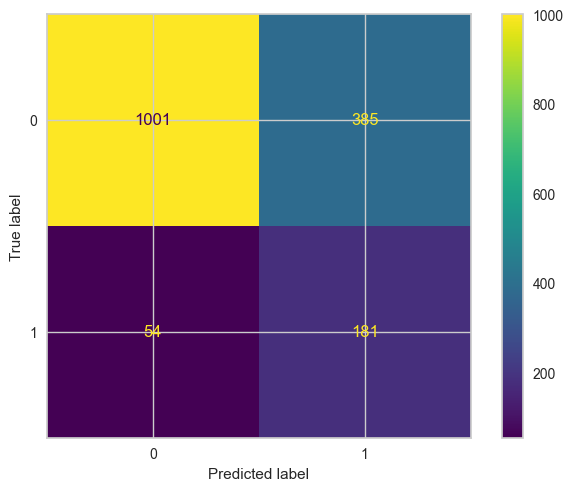

In [68]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix_val = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


## Hyperparameter Tuning with GridSearchCV

In [69]:
param_grid = {'C': [0.1,1, 10, 15,20, 50, 100], #regularization parameter. Small C means more regularization (more generalized results)
              'gamma': [0.001, 0.00001, 0.0000001], #small gamma will create a smoother decision boundary, while a large gamma will make the decision boundary more irregular
              'kernel': ['rbf','sigmoid']} #different kernel types

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=True, n_jobs=-1)

#fit small portion of the data to grid search
X_val_small = X_val[:1000]
y_val_small = y_val[:1000]
grid.fit(X_val,y_val)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 15, 20, 50, 100],
                         'gamma': [0.001, 1e-05, 1e-07],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=True)

In [70]:
print(grid.best_params_)

{'C': 15, 'gamma': 1e-07, 'kernel': 'rbf'}


## Fit SVM with best parameters

In [71]:
best_params = grid.best_params_

best_svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_svm.fit(X_train_res, y_train_res)

y_val_pred = best_svm.predict(X_val)

print("\nValidation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Set Recall:", recall_score(y_val, y_val_pred))

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1386
           1       0.52      0.83      0.64       235

    accuracy                           0.87      1621
   macro avg       0.75      0.85      0.78      1621
weighted avg       0.90      0.87      0.88      1621

Validation Set Accuracy: 0.865515114127082
Validation Set Recall: 0.8297872340425532


Text(0.5, 1.0, 'Recall Before and After Grid Search')

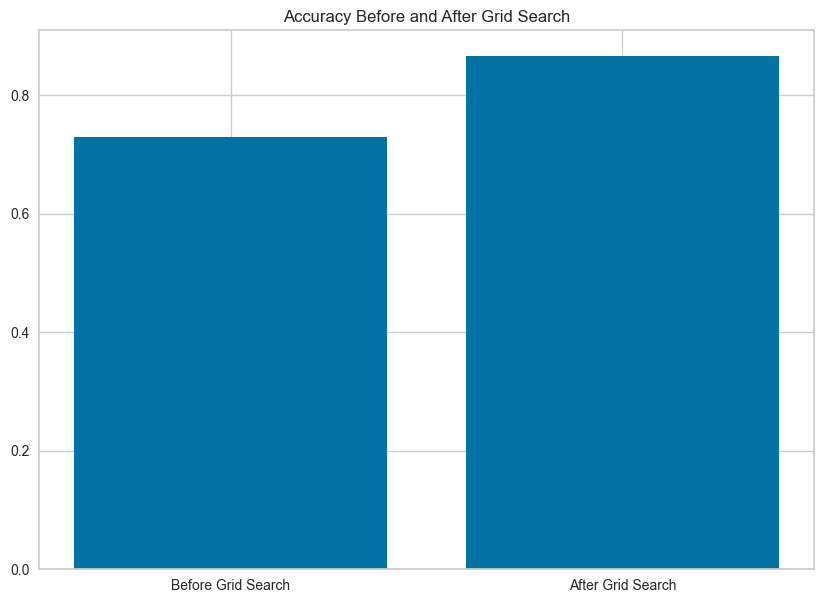

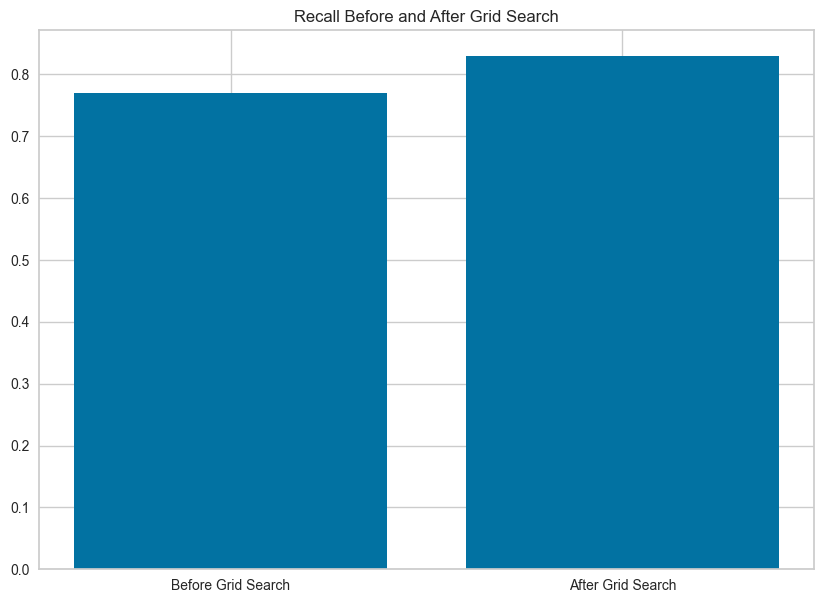

In [76]:
# Plot improvement before and after grid search

from matplotlib import pyplot as plt


labels = ['Before Grid Search', 'After Grid Search']
accuracy = [0.729,0.866]
recall = [0.770,0.830]

# plot the data
fig = plt.figure(figsize =(10, 7))
plt.bar(labels, accuracy)
plt.title('Accuracy Before and After Grid Search')


fig2 = plt.figure(figsize =(10, 7))
plt.bar(labels, recall)
plt.title('Recall Before and After Grid Search')



## Validation

## PR Curve

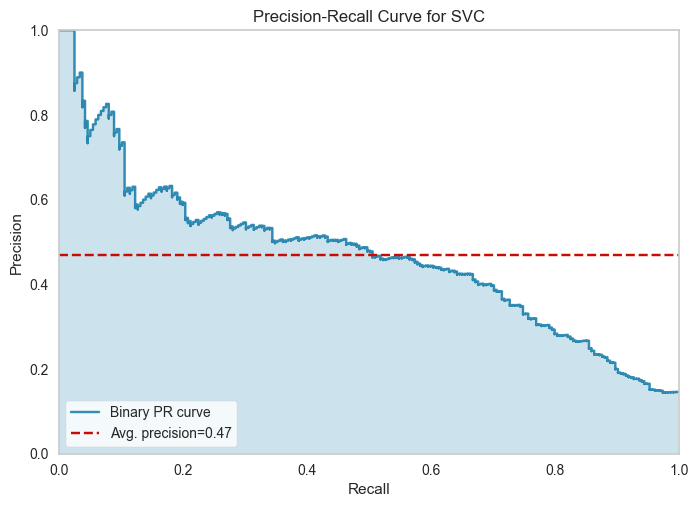

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [63]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(svm, is_fitted=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_val, y_val)
viz.show()

## ROC-AUC

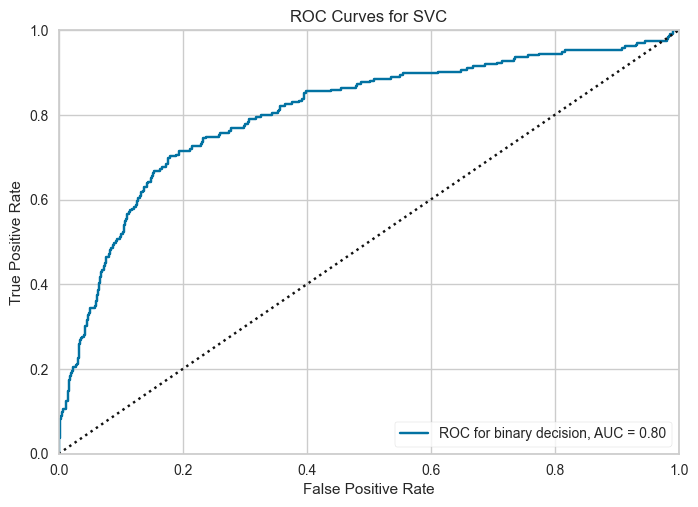

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(svm, classes=classes, is_fitted=True, binary = True)

visualizer.fit(X_train_res, y_train_res)       
visualizer.score(X_val, y_val)      
visualizer.show()

ROC is 0.8, this shows that the model performs well at distinguishing posistive and negative values. 

In [ ]:
# Use learning curve to check overfitting
from sklearn.model_selection import StratifiedKFold, learning_curve


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = learning_curve(
    svm,  # Move svm before X_train_res
    X=X_train_res,  # Pass the 'X' argument
    y=y_train_res,  # Pass the 'y' argument
    cv=cv, 
    scoring='recall', 
    train_sizes=sizes, 
    n_jobs=8
)

X_train_small = X_train_res[:1000]
y_train_small = X_train_res[:1000]
visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 
